In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/extrasensory_Xu')
os.getcwd()

'/content/drive/My Drive/extrasensory_Xu'

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from utilize.data import *
from utilize.transform import *
from utilize.feature_selection import *
from utilize.test import *
from utilize.model import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Found 60 users data.


Using TensorFlow backend.


In [0]:
import importlib
import utilize.transform as transform
import utilize.test as test
import utilize.model as model
import utilize.feature_selection as feature_selection
importlib.reload(transform)
importlib.reload(test)
importlib.reload(model)
importlib.reload(feature_selection)

<module 'utilize.feature_selection' from '/content/drive/My Drive/extrasensory_Xu/utilize/feature_selection.py'>

In [0]:
import os 
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [0]:
os.listdir('result')

['f_20.csv',
 'f_20_1.csv',
 'f_225_1.csv',
 'f_225_2.csv',
 'f_50_1.csv',
 'f_50_2.csv',
 'random_selection_0420.json',
 'f_225_l_51_1.csv',
 'f_225_l_51_2.csv']

In [0]:
# Used to load the selection result from files
def load_log_matric(filename):
    path = os.path.join('result', filename)
    df = pd.read_csv(path, index_col = 0)
    df.loc[1, 'feature_idx'] = df.loc[1, 'feature_idx'].split(',')[0] + df.loc[1, 'feature_idx'].split(',')[1]
    df['features'] = [[int(f) for f in features[1:-1].split(',')] for features in df['feature_idx']]
    df['n_features'] = [len(features) for features in df['features']]
    df['avg_score'] = [float(avg_score) for avg_score in df['avg_score']]
    t = []
    for i in range(225):
      for f in df.loc[i+1, 'features']:
        if f not in t:
          t.append(f)
    
    return pd.DataFrame({'n_features': df['n_features'], 'features': df['features'], 'avg_score': df['avg_score'], 'selected_features': t})

In [0]:
df_f_225_1 = load_log_matric('f_225_1.csv')
df_f_225_2 = load_log_matric('f_225_2.csv')
f_225_l_51_1 = load_log_matric('f_225_l_51_1.csv')
f_225_l_51_2 = load_log_matric('f_225_l_51_2.csv')
log_matric = pd.read_json('result/random_selection_0420.json')

In [0]:
f_225_l_51_2

n_features  ... selected_features
1             1  ...               217
2             2  ...               206
3             3  ...               171
4             4  ...                19
5             5  ...               145
..          ...  ...               ...
221         221  ...                63
222         222  ...                 2
223         223  ...                48
224         224  ...               121
225         225  ...               120

[225 rows x 4 columns]

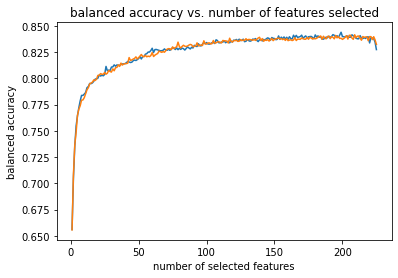

In [0]:
plt.plot(df_f_225_1['n_features'], df_f_225_1['avg_score'], df_f_225_2['n_features'], df_f_225_2['avg_score'])
plt.title('balanced accuracy vs. number of features selected')
plt.xlabel('number of selected features')
plt.ylabel('balanced accuracy')
plt.show()

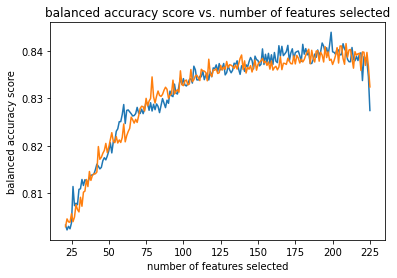

In [0]:
plt.plot(df_f_225_1['n_features'].values[20:], df_f_225_1['avg_score'].values[20:], df_f_225_2['n_features'].values[20:], df_f_225_2['avg_score'].values[20:])
plt.title('balanced accuracy score vs. number of features selected')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')
plt.show()

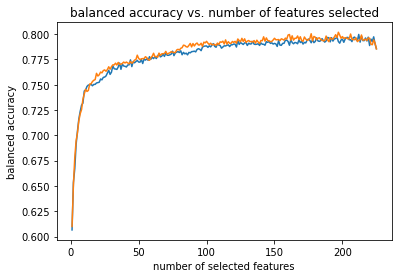

In [0]:
plt.plot(f_225_l_51_1['n_features'], f_225_l_51_1['avg_score'], f_225_l_51_2['n_features'], f_225_l_51_2['avg_score'])
plt.title('balanced accuracy vs. number of features selected')
plt.xlabel('number of selected features')
plt.ylabel('balanced accuracy')
plt.show()

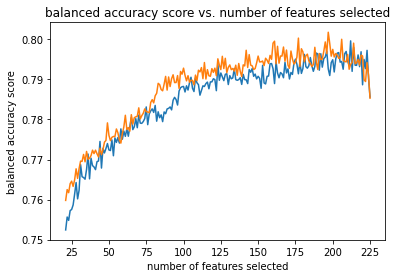

In [0]:
plt.plot(f_225_l_51_1['n_features'].values[20:], f_225_l_51_1['avg_score'].values[20:], f_225_l_51_2['n_features'].values[20:], f_225_l_51_2['avg_score'].values[20:])
plt.title('balanced accuracy score vs. number of features selected')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')
plt.show()

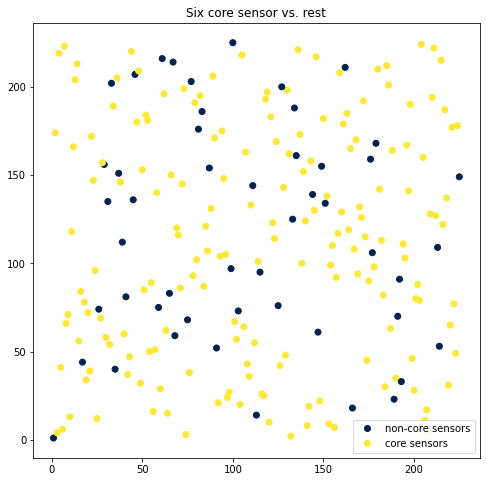

In [0]:
def plot_scatter(df1, df2):
  x1 = [0]*226
  for i, f in enumerate(df1['selected_features']):
    x1[f] = i + 1
  x1.remove(0)

  x2 = [0]*226
  for i, f in enumerate(df2['selected_features']):
    x2[f] = i + 1
  x2.remove(0)
  fig = plt.figure(figsize= (8, 8))

  scatter = plt.scatter(x1, x2, c = [1 if i in [1, 2, 6, 7, 9, 4] else -1 for i in sensor_list_num], cmap='cividis')
  plt.legend(handles=scatter.legend_elements()[0], labels = ['non-core sensors', 'core sensors'])
  plt.title('Six core sensor vs. rest')
  plt.show()
plot_scatter(df_f_225_1, df_f_225_2)

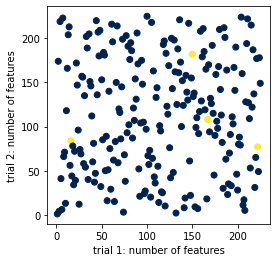

In [0]:
def plot_scatter(df1, df2):
  x1 = [0]*226
  for i, f in enumerate(df1['selected_features']):
    x1[f] = i + 1
  x1.remove(0)

  x2 = [0]*226
  for i, f in enumerate(df2['selected_features']):
    x2[f] = i + 1
  x2.remove(0)
  fig = plt.figure(figsize= (4, 4))

  scatter = plt.scatter(x1, x2, c = [1 if i in range(1,5) else -1 for i in range(225)], cmap='cividis')
  #plt.legend(handles=scatter.legend_elements()[0], labels = ['Others', 'Acc'])
  # plt.title('Acc vs. rest')
  plt.xlabel('trial 1: number of features')
  plt.ylabel('trial 2: number of features')
  plt.show()
plot_scatter(df_f_225_1, df_f_225_2)

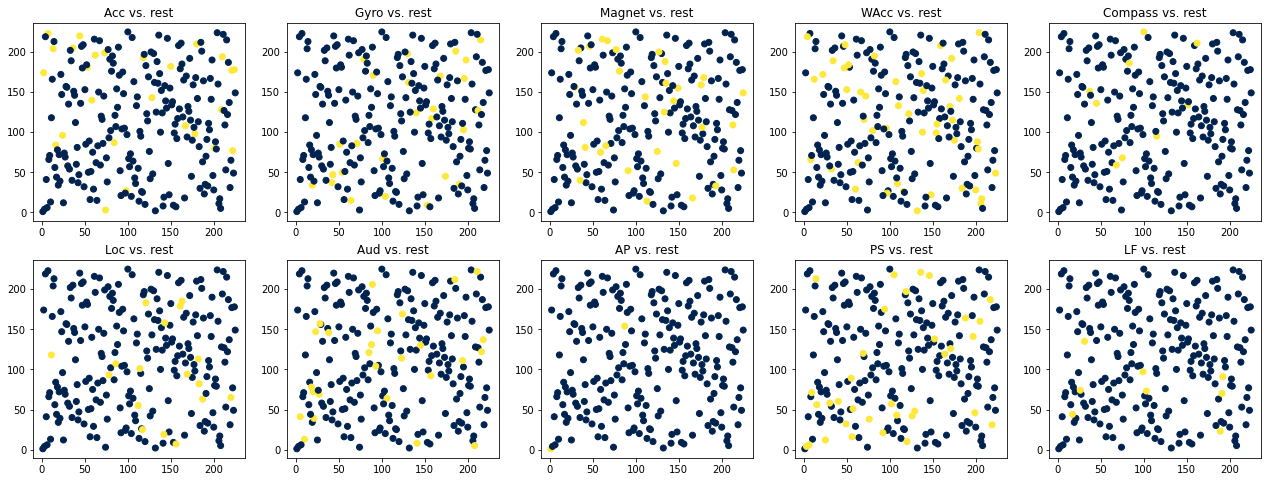

In [0]:
def plot_scatter(df1, df2):
  x1 = [0]*226
  for i, f in enumerate(df1['selected_features']):
    x1[f] = i + 1
  x1.remove(0)

  x2 = [0]*226
  for i, f in enumerate(df2['selected_features']):
    x2[f] = i + 1
  x2.remove(0)

  _, axes = plt.subplots(2, 5,figsize=(22,8))
  for i, sensor in enumerate(list(dict.fromkeys(sensor_list))): 
    axes[i//5, i%5].scatter(x1, x2, c = [1 if k == i+1 else -1 for k in sensor_list_num], cmap='cividis')
    axes[i//5, i%5].set_title("%s vs. rest" %(sensor))

  
  # plt.legend(handles=scatter.legend_elements()[0], labels = ['Others', 'Loc'])
  # plt.title('Loc vs. rest')
  # plt.show()
plot_scatter(df_f_225_1, df_f_225_2)

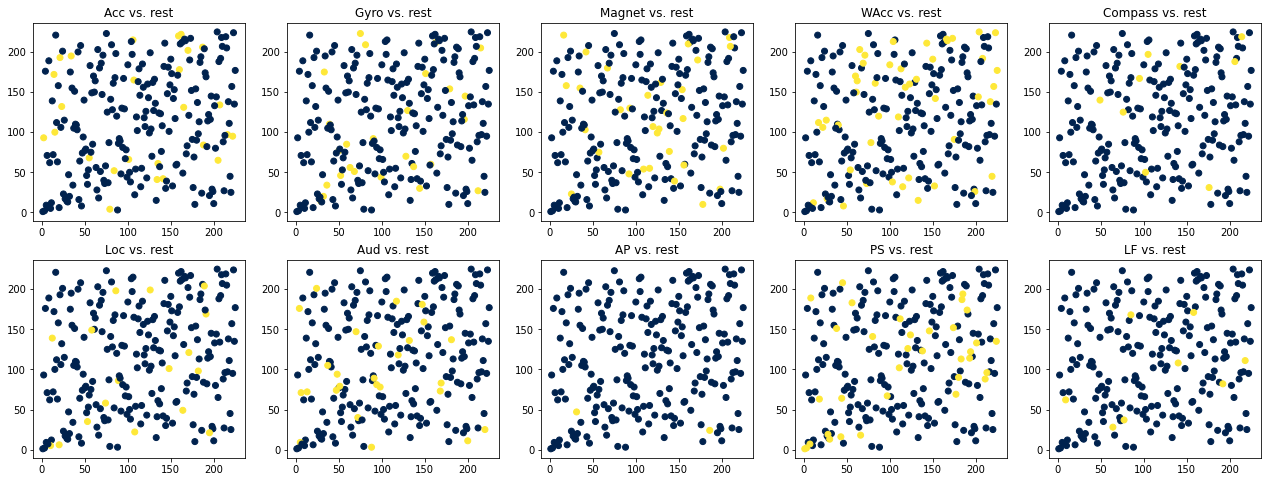

In [0]:
def plot_scatter(df1, df2):
  x1 = [0]*226
  for i, f in enumerate(df1['selected_features']):
    x1[f] = i + 1
  x1.remove(0)

  x2 = [0]*226
  for i, f in enumerate(df2['selected_features']):
    x2[f] = i + 1
  x2.remove(0)

  _, axes = plt.subplots(2, 5,figsize=(22,8))
  for i, sensor in enumerate(list(dict.fromkeys(sensor_list))): 
    axes[i//5, i%5].scatter(x1, x2, c = [1 if k == i+1 else -1 for k in sensor_list_num], cmap='cividis')
    axes[i//5, i%5].set_title("%s vs. rest" %(sensor))

  
  # plt.legend(handles=scatter.legend_elements()[0], labels = ['Others', 'Loc'])
  # plt.title('Loc vs. rest')
  # plt.show()
plot_scatter(f_225_l_51_1, f_225_l_51_2)

In [0]:
def get_sensor_names_from_features(feature_names, return_name = True):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc' if return_name else 1;
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro' if return_name else 2;
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet' if return_name else 3;
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc' if return_name else 4;
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass' if return_name else 5;
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc' if return_name else 6;
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc' if return_name else 6;
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud' if return_name else 7;
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP' if return_name else 8;
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS' if return_name else 9;
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF' if return_name else 10;
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;  

In [0]:
sensor_list_num = get_sensor_names_from_features(feature_names, return_name = False)
sensor_list = get_sensor_names_from_features(feature_names, return_name = True)

In [0]:
sensor_list_num, list(dict.fromkeys(sensor_list))

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9,
        9, 9, 9, 9, 9, 9, 9], dtype=object),
 ['Acc', 'Gyro', 'Magnet', 'WAcc', 'Compass', 'Loc', 'Aud', 'AP', 'PS', 'LF'])

## Try random selection and compare the result

In [0]:
X, y, M, user_index, feature_names, label_names = load_all_data()

# Only select body state label
target_label = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'BICYCLING', 'OR_standing']

# Use the last 5 user's data as test set
test_uuid = list(range(56, 61))

# Fill the Nan with mean value and normalize all the data 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

# Transform 
# 1. select target labels 
# 2. tansform feature matrix fill None with mean and do the normalization
# 3. Split train, validation and test set by ratio of 6:2:2
X_new, y_new, M_new = select_target_labels(X, y, M, label_names, label_names, drop_all_zero = False)
X_new = pipeline.fit_transform(X_new, y_new)
X_train, y_train, M_train, X_val, y_val, M_val, X_test, y_test, M_test = random_split(X_new, y_new, M_new, test_size = 0.2, val_size = 0.2, random_seed = 42)

In [0]:
y_train.shape

(226408, 51)

In [0]:
mlp = MLP_model([16, 16], target_label, epoches = 30, learning_rate = 0.00005)
mlp.fit(X_train, y_train, X_val, y_val, M_train, M_val, report = True)

Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.701567
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.644454
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.651153
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.710105
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.661724
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.621348
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.623509
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.618025       0.740080       0.602064       0.671072       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.504924
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.514867
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.537041
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.555420
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.522866
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.477189
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.530828
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.719199       0.751606       0.722604       0.737105       
Train 

In [0]:
_, _, _, BA = evaluate_model(mlp, X_val, y_val, W_test = np.abs(M_val-1), report = True)

accuaracy      sensitivity    specificity    BA             
0.804898       0.846157       0.798993       0.822575       


In [0]:
def random_selection(mlp, n_feature_steps, average = 10):
    
    log_matric = pd.DataFrame({'n_feature_steps':[], 'scores':[]})
    BA_list = []
    
    for n_features in n_feature_steps: 
        BAs = []
        for j in tqdm(range(average)):
            random_indice = np.random.permutation(len(feature_names))
            temp_features = [feature_names[i] for i in random_indice[:n_features]]
            feature_selector = select_features_by_name(temp_features, feature_names)
            temp_X_train = feature_selector.fit_transform(X_train)
            temp_X_val = feature_selector.transform(X_val)
            assert(temp_X_train.shape[1] == n_features)

            mlp.fit(temp_X_train, y_train, M_train = M_train, report = False)

            _, _, _, BA = evaluate_model(mlp, temp_X_val, y_val, W_test = abs(1-M_val), report = False)

            BAs.append(BA)
        BA_list.append(BAs)

    log_matric['n_feature_steps'] = n_feature_steps
    log_matric['scores'] = BA_list
    log_matric['average_score'] = [sum(BAs)/average for BAs in log_matric['scores']]
    log_matric['max_score'] = [max(BAs) for BAs in log_matric['scores']]
    
    return log_matric

In [0]:
n_feature_steps = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 225]
log_matric = random_selection(mlp, n_feature_steps, average = 10)

100%|██████████| 10/10 [06:12<00:00, 37.27s/it]


In [0]:
log_matric

n_feature_steps  ... max_score
0                 1  ...  0.626899
1                 5  ...  0.688899
2                10  ...  0.716981
3                20  ...  0.760420
4                30  ...  0.775908
5                40  ...  0.778684
6                50  ...  0.778317
7                60  ...  0.795151
8                70  ...  0.791322
9                80  ...  0.801548
10               90  ...  0.802942
11              100  ...  0.809034
12              110  ...  0.810835
13              120  ...  0.812691
14              130  ...  0.818428
15              140  ...  0.817467
16              150  ...  0.818660
17              160  ...  0.819032
18              170  ...  0.821934
19              180  ...  0.822395
20              190  ...  0.823659
21              200  ...  0.823899
22              210  ...  0.825732
23              225  ...  0.825399

[24 rows x 4 columns]

In [0]:
log_matric.to_json('log_matrix_51.json')

In [0]:
log_matric

n_feature_steps  ... max_score
0                 1  ...  0.646745
1                 5  ...  0.726124
2                10  ...  0.765655
3                20  ...  0.784575
4                30  ...  0.788938
5                40  ...  0.805702
6                50  ...  0.813327
7                60  ...  0.811081
8                70  ...  0.819093
9                80  ...  0.823116
10               90  ...  0.826923
11              100  ...  0.825870
12              110  ...  0.832503
13              120  ...  0.827544
14              130  ...  0.832648
15              140  ...  0.833840
16              150  ...  0.840320
17              160  ...  0.835846
18              170  ...  0.837237
19              180  ...  0.838699
20              190  ...  0.841302
21              200  ...  0.842378
22              210  ...  0.840821
23              225  ...  0.843866

[24 rows x 4 columns]

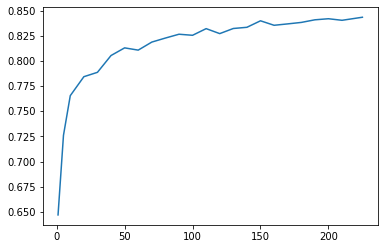

In [0]:
plt.plot(log_matric['n_feature_steps'], log_matric['max_score'])

Text(0, 0.5, 'balanced accuracy score')

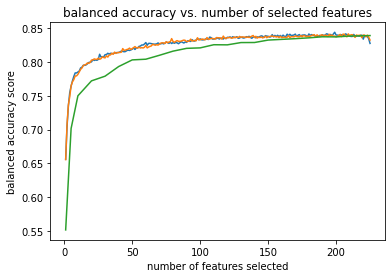

In [0]:
plt.plot(df_f_225_1['n_features'], df_f_225_1['avg_score'], df_f_225_2['n_features'], df_f_225_2['avg_score'], log_matric['n_feature_steps'], log_matric['average_score'])
plt.title('balanced accuracy vs. number of selected features')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')

Text(0, 0.5, 'balanced accuracy score')

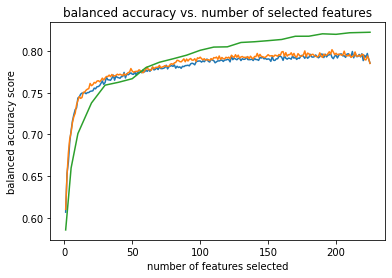

In [0]:
plt.plot(f_225_l_51_1['n_features'], f_225_l_51_1['avg_score'], f_225_l_51_2['n_features'], f_225_l_51_2['avg_score'], log_matric['n_feature_steps'], log_matric['average_score'])
plt.title('balanced accuracy vs. number of selected features')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')

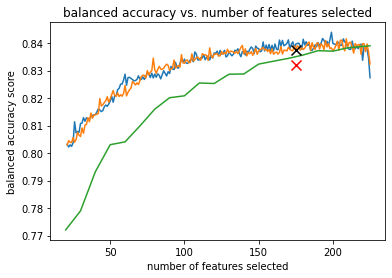

In [0]:
plt.scatter(175, 0.831889029053165, marker = 'x', c = 'red', s = 100, zorder = 1)
plt.scatter(175, 0.8374265306970002, marker = 'x', c = 'black', s = 100, zorder = 2)
plt.plot(df_f_225_1['n_features'].values[20:], df_f_225_1['avg_score'].values[20:], 
         df_f_225_2['n_features'].values[20:], df_f_225_2['avg_score'].values[20:], 
         log_matric['n_feature_steps'].values[3:], log_matric['average_score'].values[3:], zorder = 0)
plt.title('balanced accuracy vs. number of features selected')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')
plt.show()

In [0]:
sensor_name_abbriviation = {
    'raw_acc': 'Acc',
    'proc_gyro': 'Gyro', 
    'raw_magnet': 'Magnet',
    'watch_acceleration': 'WAcc',
    'watch_heading': 'Compass',
    'location': 'Loc',
    'location_quick_features': 'Loc',
    'audio_naive': 'Aud',
    'audio_properties': 'AP',
    'discrete': 'PS', 
    'lf_measurements': 'LF'
}

class select_features_by_sensors(BaseEstimator, TransformerMixin):

    '''
    Select feature by given sensor names. Compatible with sklearn transformer class.

    Keyword Arguments:
        sensors_to_use: [list] -- feature names in list we want to select
        feature_names: [list] -- feature names of all the possible features 
    '''

    def __init__(self, sensors_to_use, feature_names):
        self.sensors_to_use = sensors_to_use
        self.feature_names = feature_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        fi = []
        for i, feature in enumerate(self.feature_names):
            if sensor_name_abbriviation[feature.split(':')[0]] in self.sensors_to_use:
                fi.append(i)
    
        return X[:, fi]

Try select six core sensors and compare it with the features I selected. 

In [0]:
fs = select_features_by_sensors(['Loc', 'Acc', 'Gyro', 'WAcc', 'PS', 'Aud'], feature_names)
X_train_new = fs.fit_transform(X_train)
X_test_new = fs.transform(X_test)
X_train_new.shape

(226408, 175)

In [0]:
BA_list = []
for i in range(10): 
  mlp.fit(X_train, y_train, X_test, y_test, M_train, M_test, report = False)
  _, _, _, BA = evaluate_model(mlp, X_test, y_test, abs(1-M_test))
  BA_list.append(BA)

accuaracy      sensitivity    specificity    BA             
0.826859       0.850417       0.823672       0.837044       
accuaracy      sensitivity    specificity    BA             
0.841916       0.835788       0.831255       0.833522       
accuaracy      sensitivity    specificity    BA             
0.845213       0.832051       0.837904       0.834978       
accuaracy      sensitivity    specificity    BA             
0.830732       0.852092       0.820683       0.836387       
accuaracy      sensitivity    specificity    BA             
0.841718       0.834455       0.833638       0.834047       
accuaracy      sensitivity    specificity    BA             
0.825574       0.850456       0.825403       0.837929       
accuaracy      sensitivity    specificity    BA             
0.837904       0.850760       0.830638       0.840699       
accuaracy      sensitivity    specificity    BA             
0.841826       0.834179       0.842224       0.838201       
accuaracy      sensitivi

In [0]:
sum(BA_list)/10

0.8370216062701534

Compare with the features I selected

In [0]:
fs = select_features_by_name([feature_names[i] for i in df_f_225_1.loc[175, 'features']], feature_names)
X_train_new = fs.fit_transform(X_train)
X_test_new = fs.transform(X_test)
X_train_new.shape, y_train.shape

((226408, 175), (226408, 6))

In [0]:
BA_list = []
for i in range(10): 
  mlp.fit(X_train_new, y_train, X_test_new, y_test, M_train, M_test, report = False)
  _, _, _, BA = evaluate_model(mlp, X_test_new, y_test, abs(1-M_test))
  BA_list.append(BA)

accuaracy      sensitivity    specificity    BA             
0.839264       0.842863       0.836499       0.839681       
accuaracy      sensitivity    specificity    BA             
0.851281       0.821426       0.852428       0.836927       
accuaracy      sensitivity    specificity    BA             
0.857260       0.819444       0.855742       0.837593       
accuaracy      sensitivity    specificity    BA             
0.818122       0.865605       0.804177       0.834891       
accuaracy      sensitivity    specificity    BA             
0.835272       0.850604       0.826645       0.838625       
accuaracy      sensitivity    specificity    BA             
0.838946       0.840395       0.832182       0.836289       
accuaracy      sensitivity    specificity    BA             
0.835337       0.847307       0.824767       0.836037       
accuaracy      sensitivity    specificity    BA             
0.839406       0.840646       0.831720       0.836183       
accuaracy      sensitivi

In [0]:
sum(BA_list)/10

0.8374051750612228

Try some other feature evaluation methods

In [0]:
X_new.shape, y[:, 0].shape

((377346, 225), (377346,))

In [0]:
import seaborn as sns

corrmat = pd.DataFrame(X_new[:1000, :20]).corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [0]:
sensor_list_num
Acc_indice = []
for i in range(225):
  if sensor_list_num[i] == 1:
    Acc_indice.append(i)

In [0]:
corrmat = pd.DataFrame(X_new[:1000,Acc_indice], columns=[feature_names[i] for i in Acc_indice]).corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [0]:
def get_sensor_indice(sensor): 
  sensor_indice = []
  for i in range(225):
    if sensor_list_num[i] in sensor:
      sensor_indice.append(i)
  return sensor_indice

In [0]:
def get_user_indice(user): 
  return range(user_index[user-1], user_index[user])

[Text(0.5, 0, 'raw_acc:magnitude_stats:mean'),
 Text(1.5, 0, 'raw_acc:magnitude_stats:std'),
 Text(2.5, 0, 'raw_acc:magnitude_stats:moment3'),
 Text(3.5, 0, 'raw_acc:magnitude_stats:moment4'),
 Text(4.5, 0, 'raw_acc:magnitude_stats:percentile25'),
 Text(5.5, 0, 'raw_acc:magnitude_stats:percentile50')]

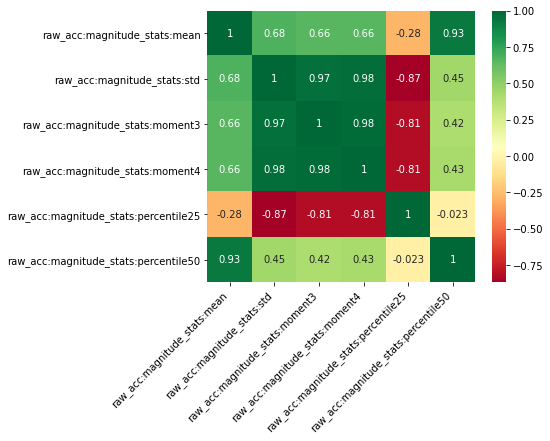

In [0]:
sensor_list_num
Acc_indice = []
for i in range(225):
  if sensor_list_num[i] == 1:
    Acc_indice.append(i)

corrmat = pd.DataFrame(X_new[:1000,0:6], columns=feature_names[0:6]).corr()
plt.figure(figsize=(6,5))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

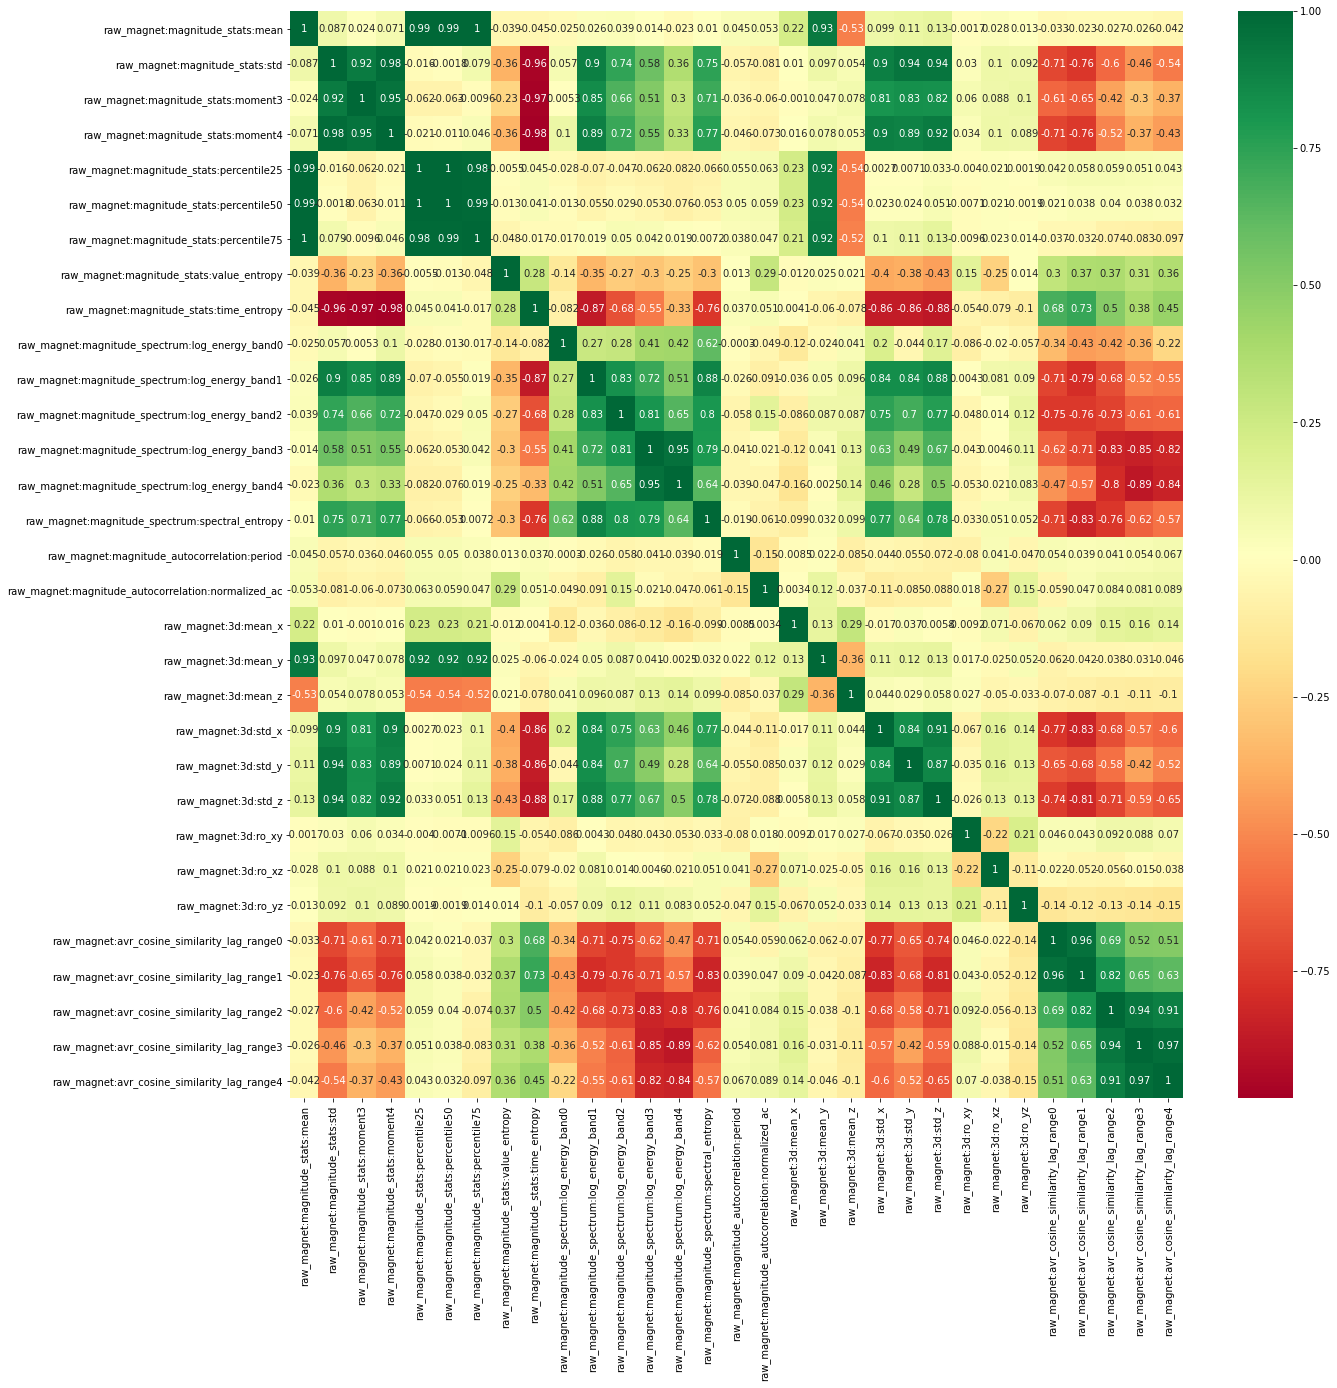

In [0]:
sensor_list_num
Acc_indice = []
for i in range(225):
  if sensor_list_num[i] == 3:
    Acc_indice.append(i)
user_index[0]
corrmat = pd.DataFrame(X_new[user_index[0]:user_index[1],Acc_indice], columns=[feature_names[i] for i in Acc_indice]).corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [0]:
def corr_matrix_user_sensor(user, sensor):
  sensor_list_num
  Acc_indice = []
  for i in range(225):
    if sensor_list_num[i] in sensor:
      Acc_indice.append(i)
  user_index[0]
  corrmat = pd.DataFrame(X_new[user_index[user]:user_index[user+1],Acc_indice], columns=[feature_names[i] for i in Acc_indice]).corr()
  plt.figure(figsize=(40,40))
  #plot heat map
  g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

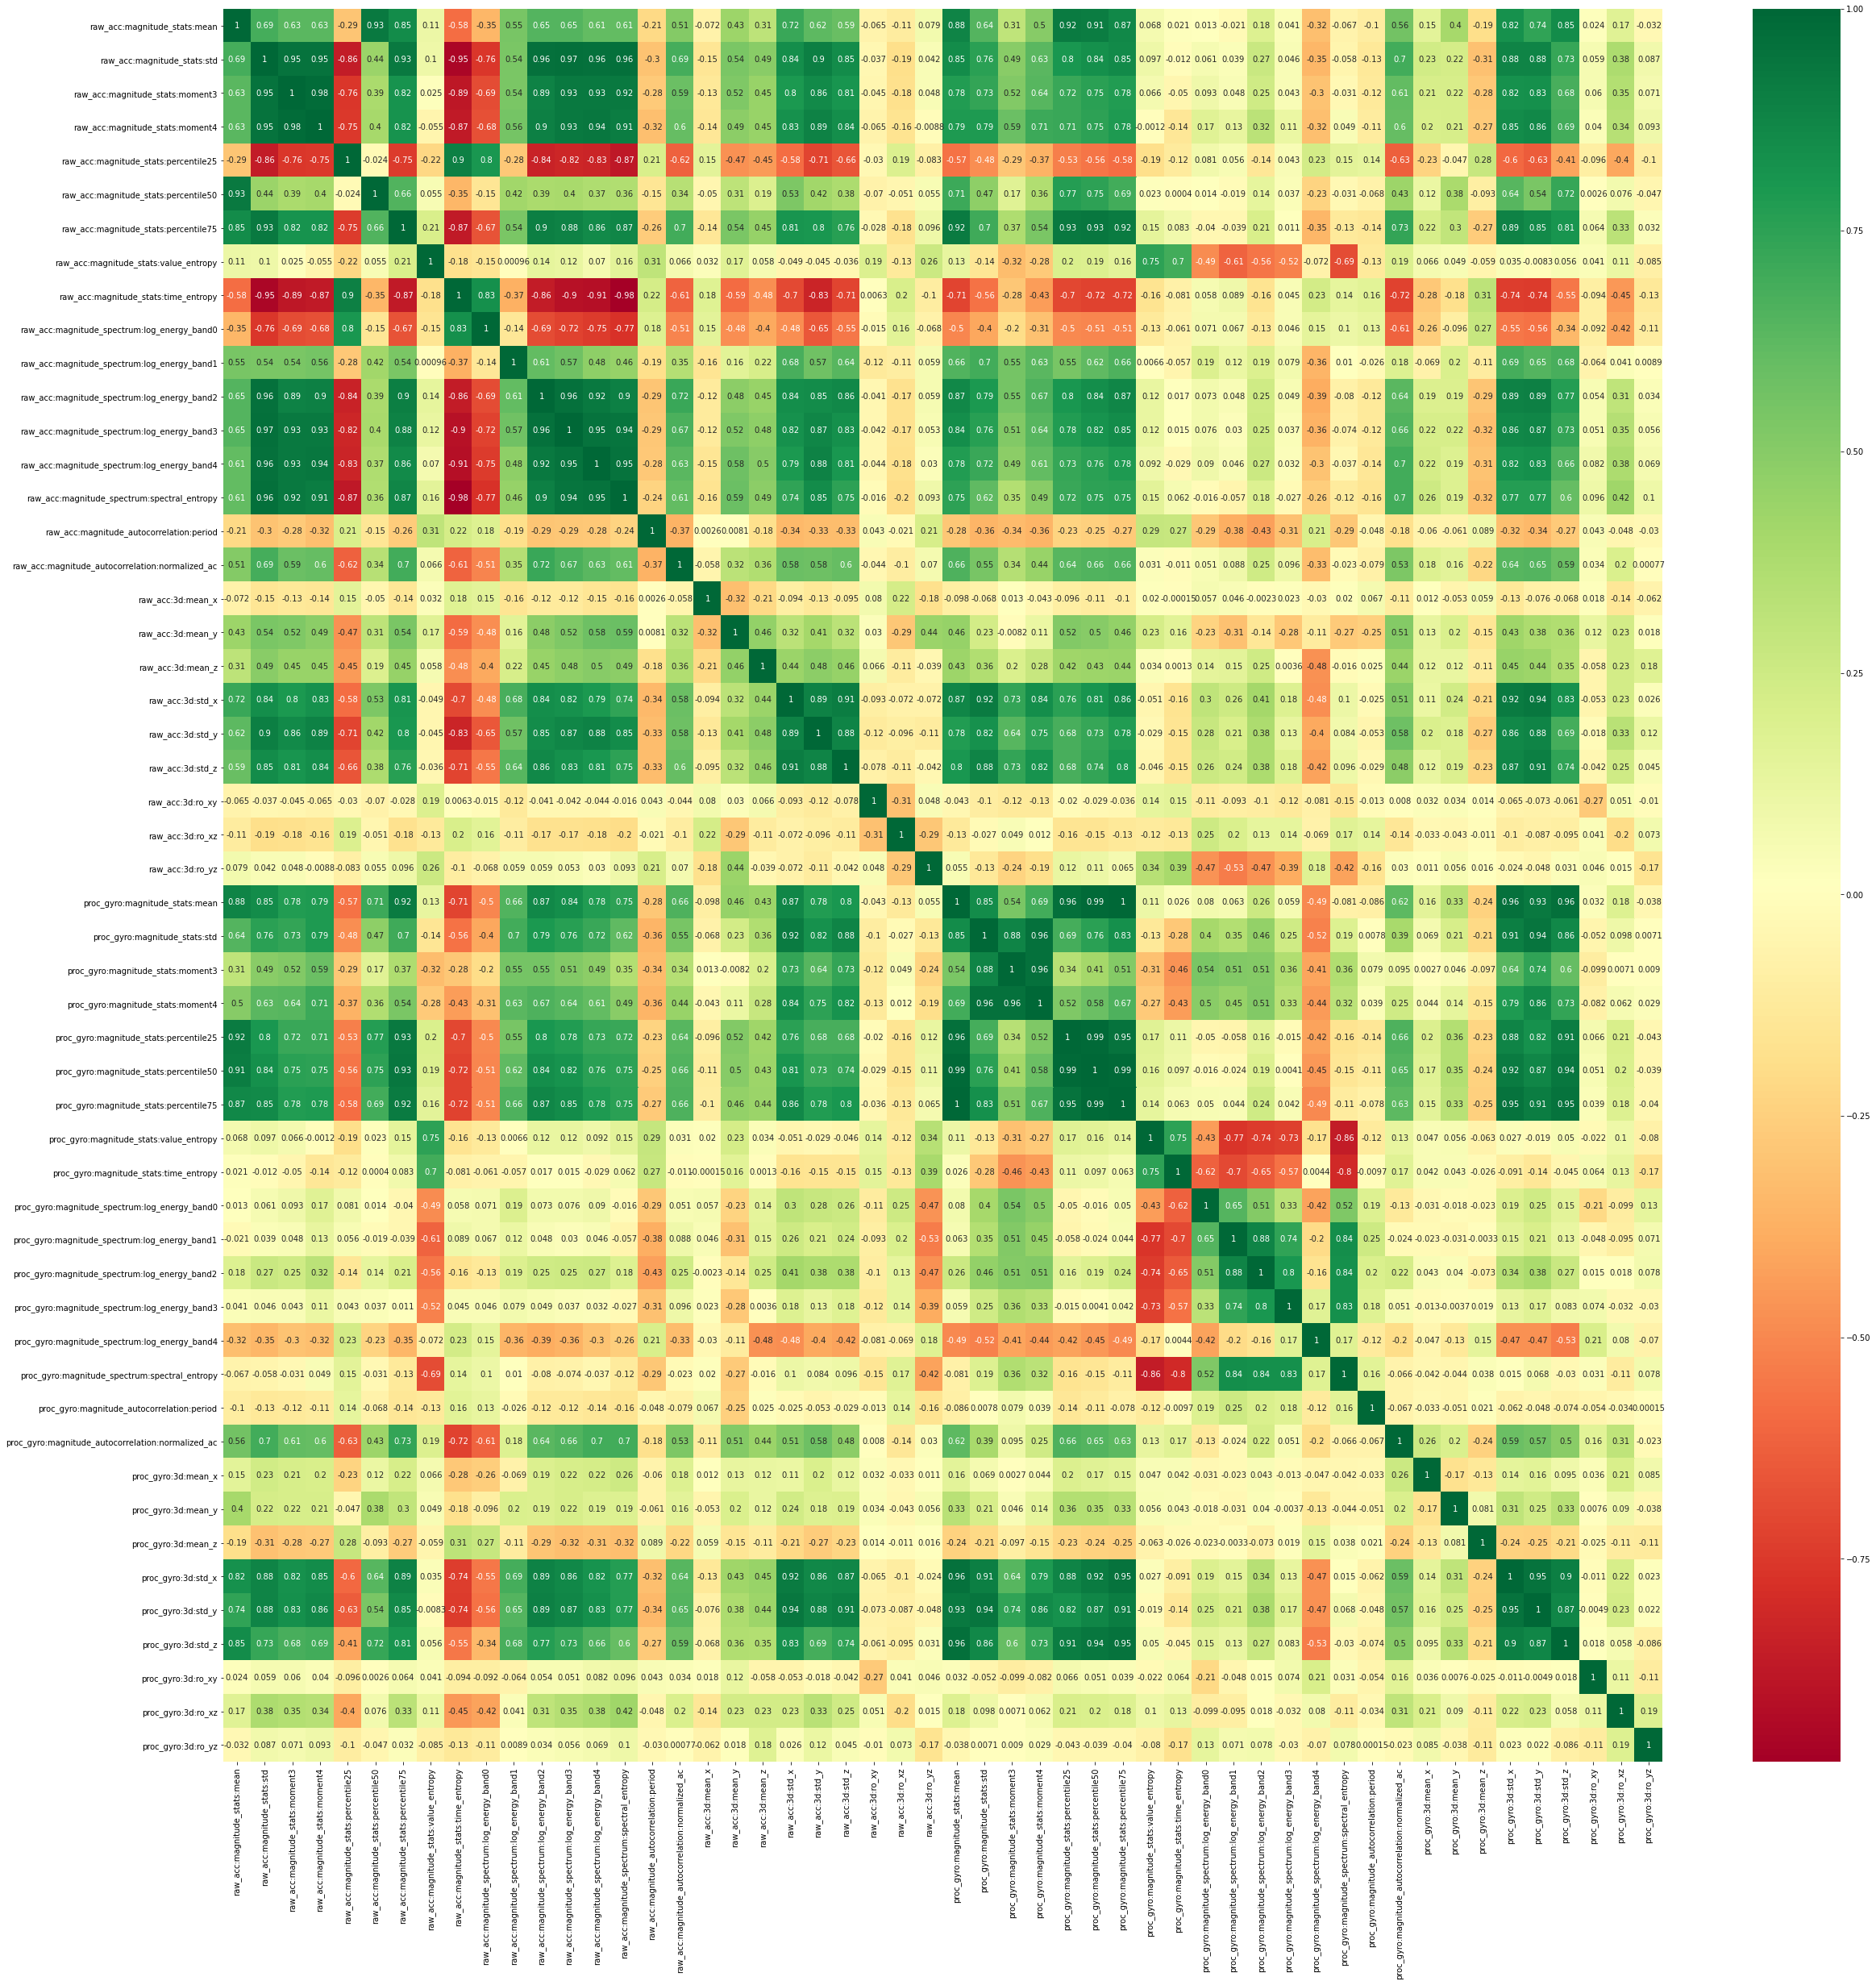

In [0]:
corr_matrix_user_sensor(0, [1,2])

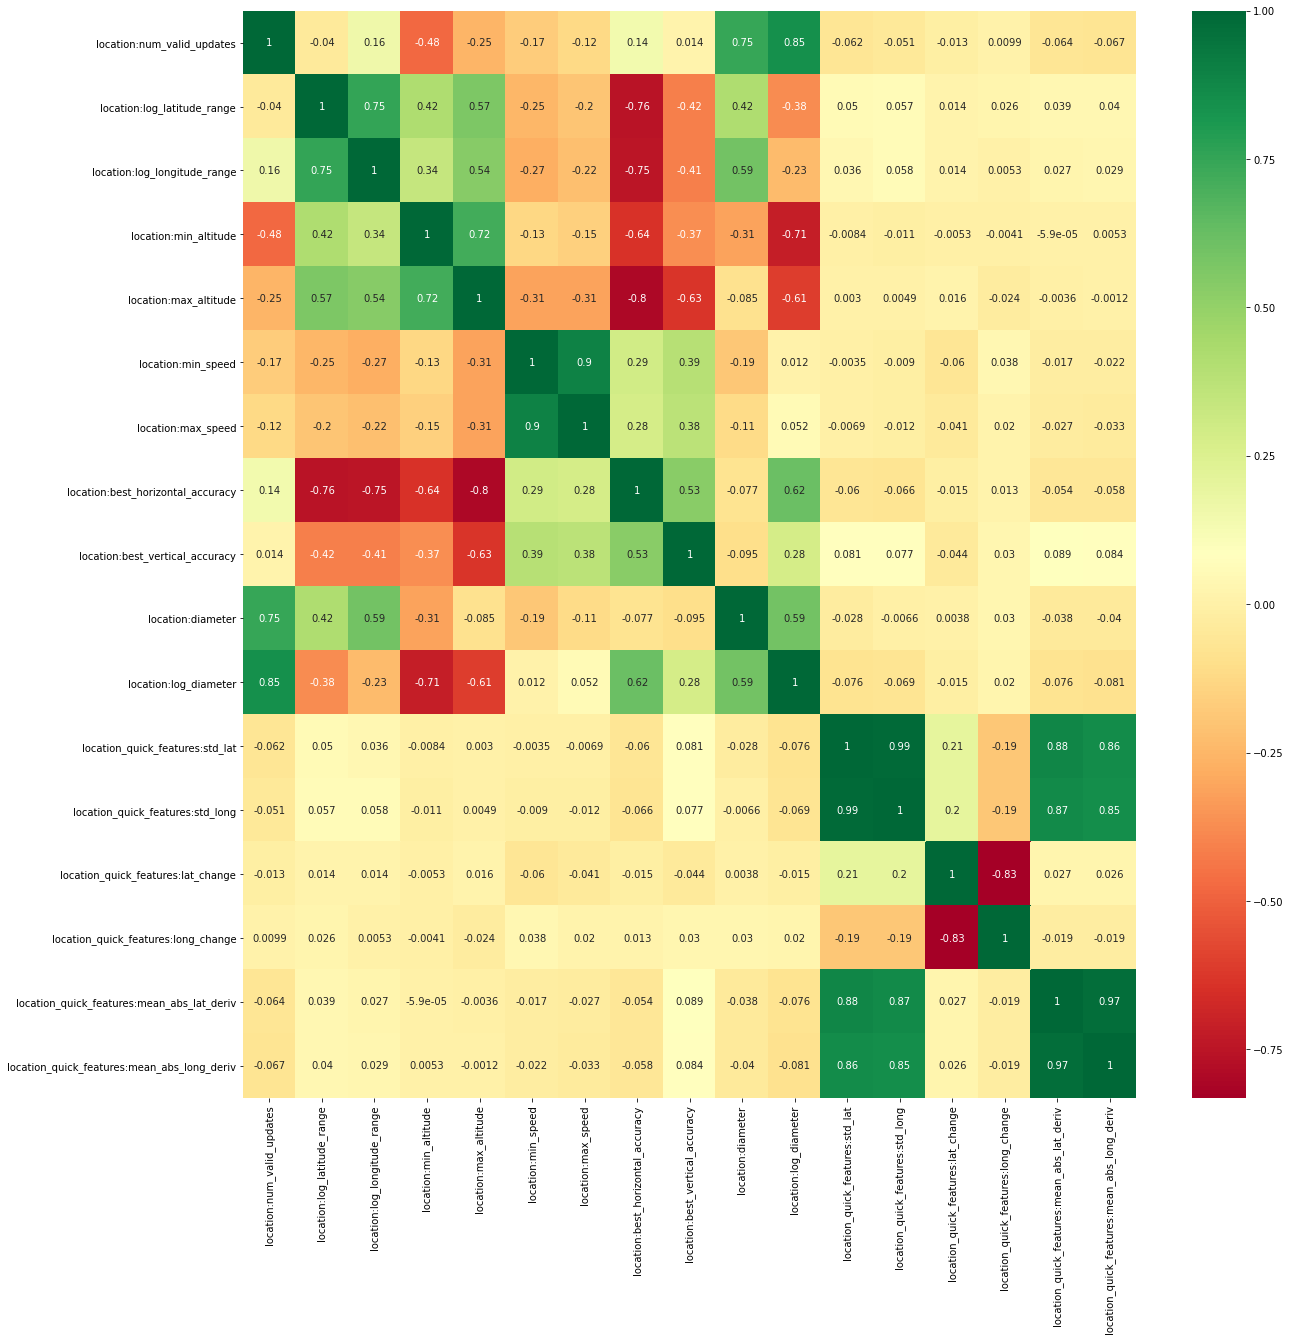

In [0]:
corr_matrix_user_sensor(0, 6)

In [0]:
list(dict.fromkeys(sensor_list))

['Acc', 'Gyro', 'Magnet', 'WAcc', 'Compass', 'Loc', 'Aud', 'AP', 'PS', 'LF']

Conclusion: in the same sensors, some features are highly correlated. Randomly pick one will lead to a similar performance. 

In [0]:
def plot_by_sensor(df, sensor): 
  sensor_indice = []
  for i in range(225):
    if sensor_list_num[i] in sensor:
      sensor_indice.append(i+1)
  count_log = []
  count = 0
  for feature in df['selected_features']: 
    if feature in sensor_indice:
      count += 1
    count_log.append(count)
  plt.plot(df['n_features'], count_log)
  plt.show()

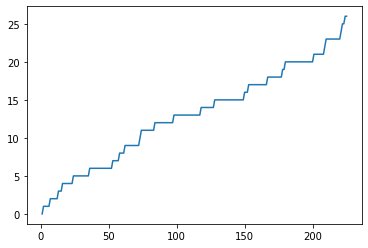

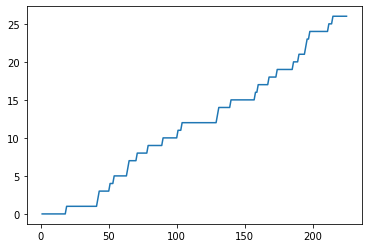

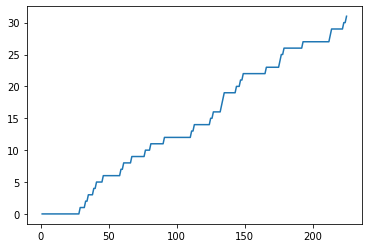

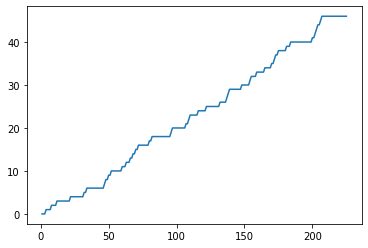

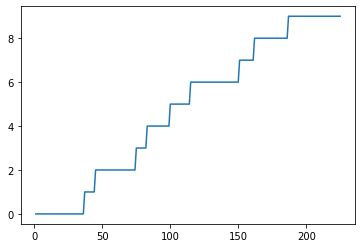

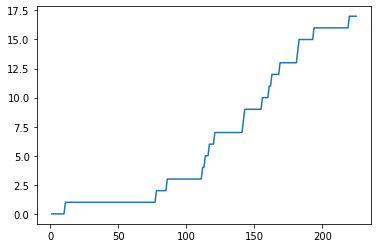

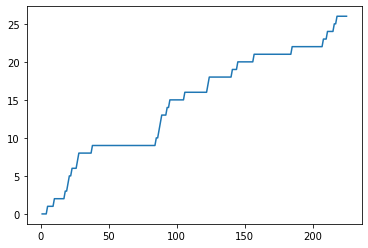

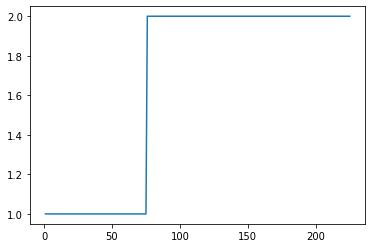

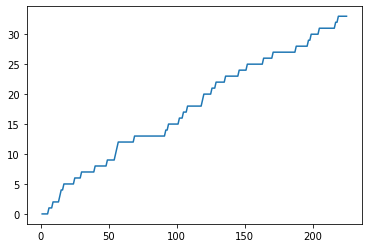

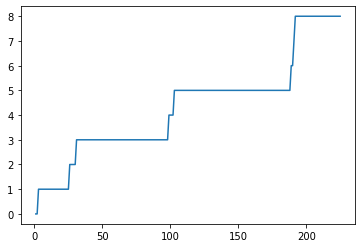

In [0]:
for i in range(10):
  plot_by_sensor(df_f_225_1, [i+1])

Visulize about feature missing 

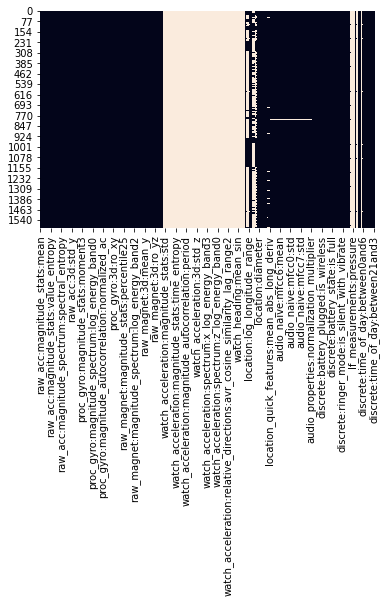

In [0]:
import seaborn as sns
sns.heatmap(pd.DataFrame(X[user_index[0]:user_index[1]], columns=feature_names).isnull(), cbar=False)

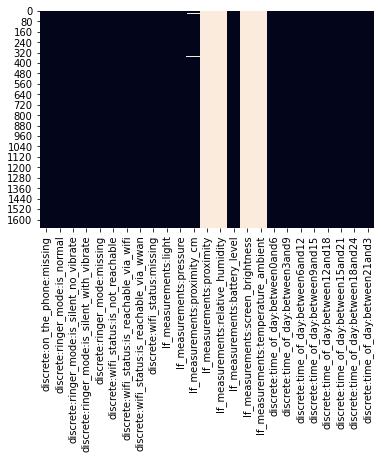

In [0]:
sns.heatmap(pd.DataFrame(X[user_index[1]:user_index[2],200:], columns=feature_names[200:]).isnull(), cbar=False)

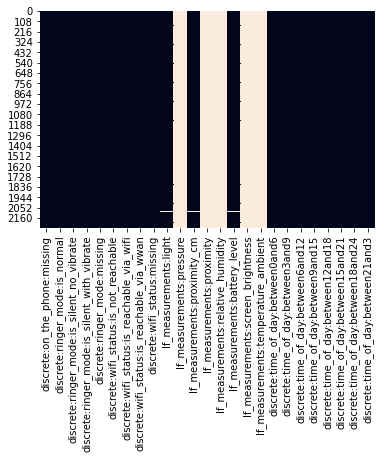

In [0]:
sns.heatmap(pd.DataFrame(X[user_index[2]:user_index[3],200:], columns=feature_names[200:]).isnull(), cbar=False)

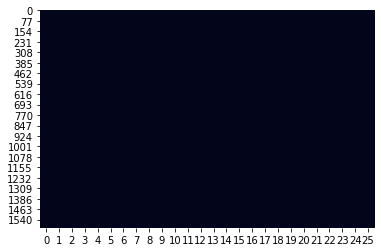

In [0]:
sns.heatmap(pd.DataFrame(X[user_index[0]:user_index[1],get_sensor_indice([1])]).isnull(), cbar=False)

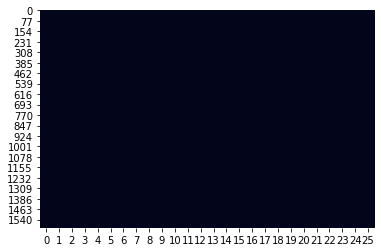

In [0]:
def plot_user_missing_by_sensor(user, sensor):
  sns.heatmap(pd.DataFrame(X[user_index[user-1]:user_index[user],get_sensor_indice(sensor)]).isnull(), cbar=False)

plot_user_missing_by_sensor(1, [1])

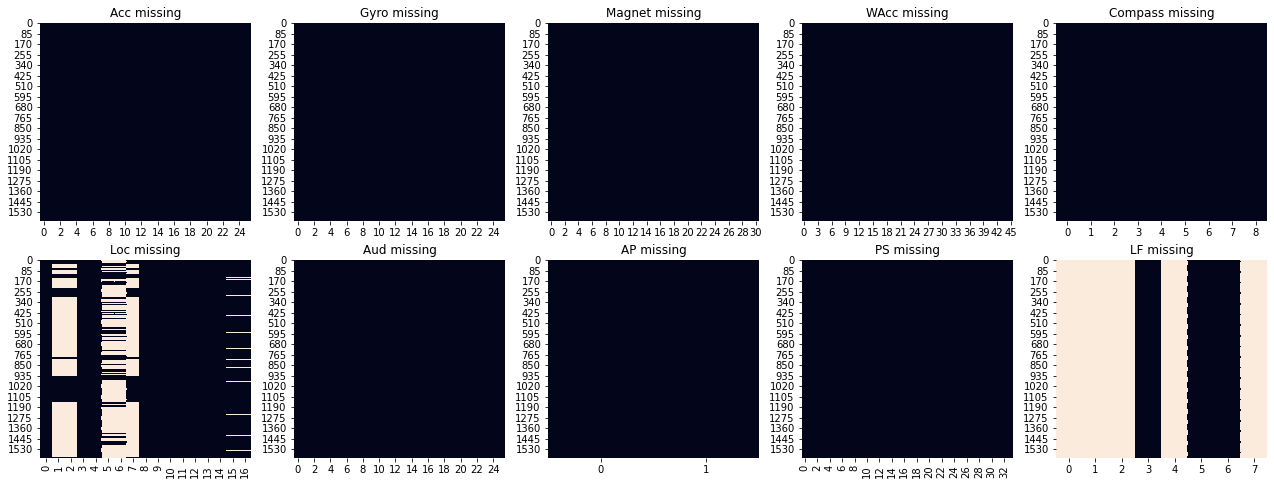

In [0]:
def plot_user_missing(user):
  fig, axes = plt.subplots(2,5, figsize = (22, 8))
  for i, sensor in enumerate(list(dict.fromkeys(sensor_list))): 
    sns.heatmap(pd.DataFrame(X[user_index[user-1]:user_index[user],get_sensor_indice([i+1])]).isnull(), cbar=False, ax = axes[i//5, i%5])
    axes[i//5, i%5].set_title("%s missing" %(sensor))

plot_user_missing(1)

In [0]:
for i in range(1,60): 
  plot_user_missing(i)

Some conclusions:

* PS (phone state) has no missing at all
* Acc Gyro Aud have very sparse missing instance, magnet, WAcc and Compass following with some missing instance. All of these sensors, if they are missing, then all the features related to that sensor will be missing
* Loc and LF can have some individual features missing, and LF once a feature is missing, then it is missing for all the instance from a that user. 

<BarContainer object of 225 artists>

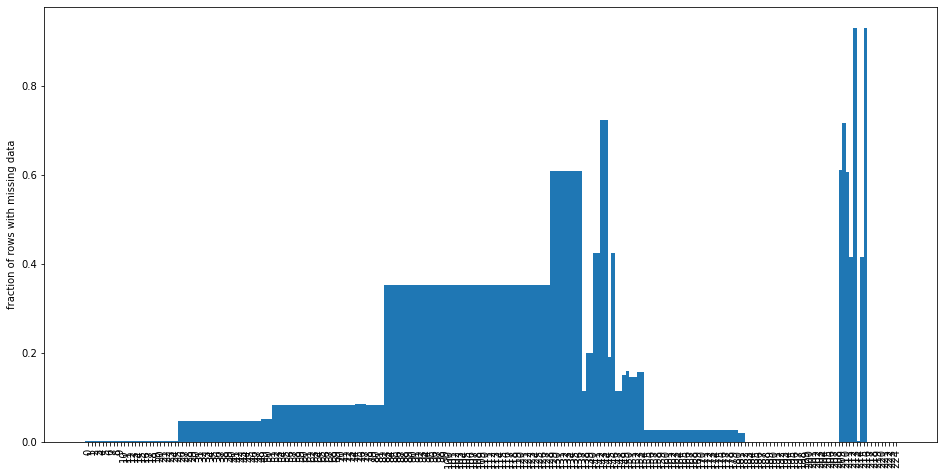

In [0]:
# Hist plot of instances missing ratio
df = pd.DataFrame(X)
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts, width = 1)

In [0]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

377346 1600 7521


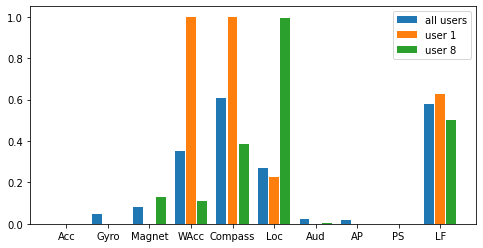

In [0]:
def plot_hist_missing_by_sensor(users = [1,2]):
  df = pd.DataFrame(X)
  df_1 = pd.DataFrame(X[user_index[users[0]-1]:user_index[users[0]], :])
  df_2 = pd.DataFrame(X[user_index[users[1]-1]:user_index[users[1]], :])
  null_counts_all = np.array(df.isnull().sum()/len(df))
  null_count_all_sensor = [] 
  null_counts_1 = np.array(df_1.isnull().sum()/len(df_1))
  null_count_1_sensor = [] 
  null_counts_2 = np.array(df_2.isnull().sum()/len(df_2))
  null_count_2_sensor = [] 
  print(len(df), len(df_1), len(df_2))
  for i, sensor in enumerate(list(dict.fromkeys(sensor_list))): 
    s_all = sum(null_counts_all[get_sensor_indice([i+1])])/len(get_sensor_indice([i+1]))
    s_1 = sum(null_counts_1[get_sensor_indice([i+1])])/len(get_sensor_indice([i+1]))
    s_2 = sum(null_counts_2[get_sensor_indice([i+1])])/len(get_sensor_indice([i+1]))
    null_count_all_sensor.append(s_all)
    null_count_1_sensor.append(s_1)
    null_count_2_sensor.append(s_2)
  data = {'all users': null_count_all_sensor,
          'user 1': null_count_1_sensor, 
          'user 8': null_count_2_sensor}
  fig, ax = plt.subplots(figsize = (8, 4))
  bar_plot(ax, data, total_width=.8, single_width=.9)
  ax.set_xticks(range(10))
  ax.set_xticklabels(list(dict.fromkeys(sensor_list)))
  plt.show()

  return df_2
df = plot_hist_missing_by_sensor(users = [1,8])

In [0]:
df[get_sensor_indice([5])]

129  130  131  132  133  134  135  136  137
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...  ...
1595  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1596  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1597  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1598  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1599  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[1600 rows x 9 columns]

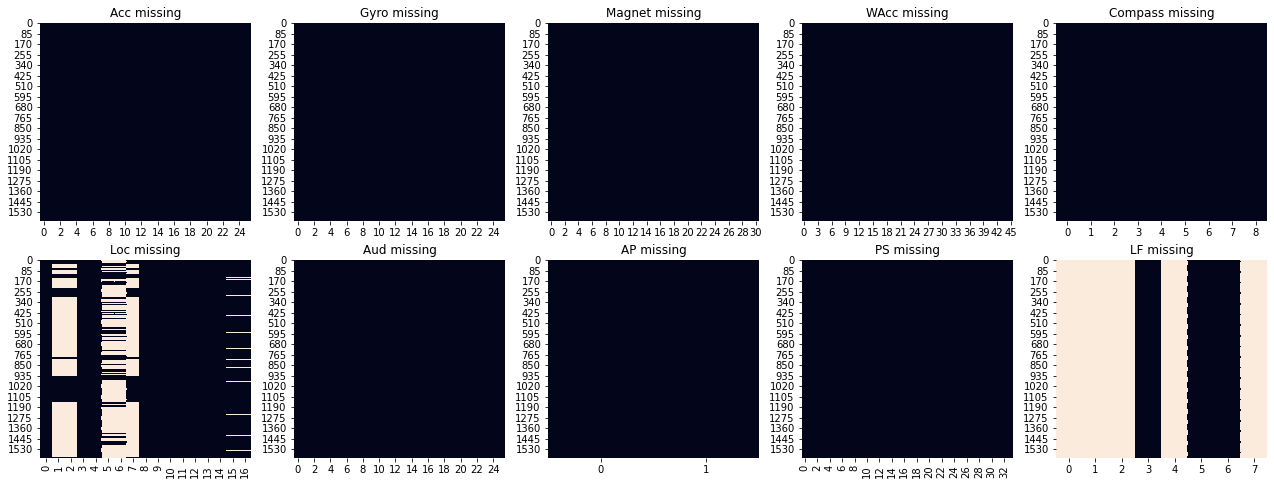

In [0]:
plot_user_missing(1)

# Autoencoder feature selection


In [0]:
rrfs = RRFS(225)
rrfs.train_autoencoder(X_train, X_val = X_val)

Train on 226408 samples, validate on 75469 samples
Epoch 1/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.6593 - val_loss: 0.5264
Epoch 2/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.5373 - val_loss: 0.4928
Epoch 3/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.5138 - val_loss: 0.4787
Epoch 4/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.5052 - val_loss: 0.4734
Epoch 5/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.5015 - val_loss: 0.4718
Epoch 6/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.4995 - val_loss: 0.4697
Epoch 7/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.4982 - val_loss: 0.4690
Epoch 8/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.4976 - val_loss: 0.4680
Epoch 9/100
226408/226408 [==============================] - 3s 12us/step - loss: 0.4

In [0]:
rrfs_feature_score = rrfs.feature_scores()
rrfs_features = np.argsort(rrfs_feature_score)[::-1][:175]
rrfs.feature_index(k_features=10)

array([ 92,  88, 112,   5,  83, 113,  53,   4, 190, 114])

In [0]:
fs = select_features_by_name([feature_names[i] for i in rrfs_features], feature_names)
X_train_new = fs.fit_transform(X_train)
X_val_new = fs.transform(X_val)
X_train_new.shape

(226408, 175)

In [0]:
mlp = MLP_model([64, 64], target_label, epoches = 20, learning_rate = 0.00005)
BA_list = []
for i in range(10): 
  mlp.fit(X_train_new, y_train, X_val_new, y_val, M_train, M_test, report = False)
  _, _, _, BA = evaluate_model(mlp, X_val_new, y_val, abs(1-M_val))
  BA_list.append(BA)

accuaracy      sensitivity    specificity    BA             
0.712897       0.395520       0.728377       0.561948       
accuaracy      sensitivity    specificity    BA             
0.713227       0.375892       0.739654       0.557773       
accuaracy      sensitivity    specificity    BA             
0.726091       0.377833       0.747212       0.562523       
accuaracy      sensitivity    specificity    BA             
0.733893       0.302709       0.768800       0.535754       
accuaracy      sensitivity    specificity    BA             
0.783064       0.322181       0.812527       0.567354       


KeyboardInterrupt: ignored

In [0]:
sum(BA_list)/10

0.8343543966976033

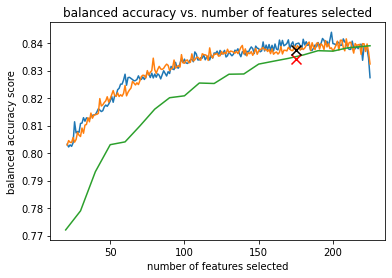

In [0]:
plt.scatter(175, 0.8343543966976033, marker = 'x', c = 'red', s = 100, zorder = 1)
plt.scatter(175, 0.8374265306970002, marker = 'x', c = 'black', s = 100, zorder = 2)
plt.plot(df_f_225_1['n_features'].values[20:], df_f_225_1['avg_score'].values[20:], 
         df_f_225_2['n_features'].values[20:], df_f_225_2['avg_score'].values[20:], 
         log_matric['n_feature_steps'].values[3:], log_matric['average_score'].values[3:], zorder = 0)
plt.title('balanced accuracy vs. number of features selected')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')
plt.show()

In [0]:
def repeat_selection_on_test(fss, n_feature_steps, average = 5): 
  log_matric = pd.DataFrame({'n_feature_steps':[], 'scores':[]})
  BA_list = []
  for n_feature in n_feature_steps:
    temp_features = fss.feature_index(k_features = n_feature)
    fs = select_features_by_name([feature_names[i] for i in temp_features], feature_names)
    X_train_new = fs.fit_transform(X_train)
    X_test_new = fs.transform(X_test)
    X_train_new.shape, y_train.shape

    BAs = []
    for i in range(average): 

      mlp.fit(X_train_new, y_train, X_test_new, y_test, M_train, M_test, report = False)
      _, _, _, BA = evaluate_model(mlp, X_test_new, y_test, abs(1-M_test))
      BAs.append(BA)

    BA_list.append(BAs)
  log_matric['n_feature_steps'] = n_feature_steps
  log_matric['scores'] = BA_list
  log_matric['average_score'] = [sum(BAs)/average for BAs in log_matric['scores']]
  log_matric['max_score'] = [max(BAs) for BAs in log_matric['scores']]

  return log_matric

In [0]:
mlp = MLP_model([16, 16], target_label, epoches = 20, learning_rate = 0.00005)
n_feature_steps = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 225]
rrfs_log_matrix = repeat_selection_on_test(rrfs, n_feature_steps, average = 5)

accuaracy      sensitivity    specificity    BA             
0.558833       0.647483       0.536758       0.592121       
accuaracy      sensitivity    specificity    BA             
0.622569       0.559486       0.614402       0.586944       
accuaracy      sensitivity    specificity    BA             
0.554876       0.697869       0.501452       0.599661       
accuaracy      sensitivity    specificity    BA             
0.558453       0.642404       0.539999       0.591202       
accuaracy      sensitivity    specificity    BA             
0.577675       0.621633       0.564145       0.592889       
accuaracy      sensitivity    specificity    BA             
0.679770       0.637922       0.636865       0.637393       
accuaracy      sensitivity    specificity    BA             
0.722757       0.577592       0.719891       0.648742       
accuaracy      sensitivity    specificity    BA             
0.714547       0.562700       0.724353       0.643526       
accuaracy      sensitivi

# Repest the result on test set


In [0]:
def repeat_selection_on_test(df, n_feature_steps, average = 5): 
  log_matric = pd.DataFrame({'n_feature_steps':[], 'scores':[]})
  BA_list = []
  for n_feature in n_feature_steps:

    fs = select_features_by_name([feature_names[i] for i in df.loc[n_feature, 'features']], feature_names)
    X_train_new = fs.fit_transform(X_train)
    X_test_new = fs.transform(X_test)
    X_train_new.shape, y_train.shape

    BAs = []
    for i in range(average): 

      mlp.fit(X_train_new, y_train, X_test_new, y_test, M_train, M_test, report = False)
      _, _, _, BA = evaluate_model(mlp, X_test_new, y_test, abs(1-M_test))
      BAs.append(BA)

    BA_list.append(BAs)
  log_matric['n_feature_steps'] = n_feature_steps
  log_matric['scores'] = BA_list
  log_matric['average_score'] = [sum(BAs)/average for BAs in log_matric['scores']]
  log_matric['max_score'] = [max(BAs) for BAs in log_matric['scores']]

  return log_matric

In [0]:
mlp = MLP_model([16, 16], target_label, epoches = 20, learning_rate = 0.00005)
n_feature_steps = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 225]
df_f_225_1_test = repeat_selection_on_test(df_f_225_1, n_feature_steps)

accuaracy      sensitivity    specificity    BA             
0.572796       0.793555       0.546608       0.670082       
accuaracy      sensitivity    specificity    BA             
0.593554       0.765778       0.573974       0.669876       
accuaracy      sensitivity    specificity    BA             
0.682788       0.687521       0.657889       0.672705       
accuaracy      sensitivity    specificity    BA             
0.587214       0.776548       0.561355       0.668952       
accuaracy      sensitivity    specificity    BA             
0.666908       0.710919       0.647934       0.679426       
accuaracy      sensitivity    specificity    BA             
0.766711       0.780369       0.754746       0.767557       
accuaracy      sensitivity    specificity    BA             
0.749631       0.807115       0.728421       0.767768       
accuaracy      sensitivity    specificity    BA             
0.758651       0.799425       0.744921       0.772173       
accuaracy      sensitivi

In [0]:
df_f_225_1_test

n_feature_steps  ... max_score
0                 1  ...  0.679426
1                 5  ...  0.772173
2                10  ...  0.795971
3                20  ...  0.808301
4                30  ...  0.813132
5                40  ...  0.818923
6                50  ...  0.825246
7                60  ...  0.827688
8                70  ...  0.829669
9                80  ...  0.831019
10               90  ...  0.831124
11              100  ...  0.834133
12              110  ...  0.835858
13              120  ...  0.838406
14              130  ...  0.834125
15              140  ...  0.836664
16              150  ...  0.837894
17              160  ...  0.840338
18              170  ...  0.837769
19              180  ...  0.841026
20              190  ...  0.840092
21              200  ...  0.838606
22              210  ...  0.839001
23              225  ...  0.842624

[24 rows x 4 columns]

In [0]:
df_f_225_1_test.to_json('result/df_f_225_1_test.json')

Text(0, 0.5, 'balanced accuracy score')

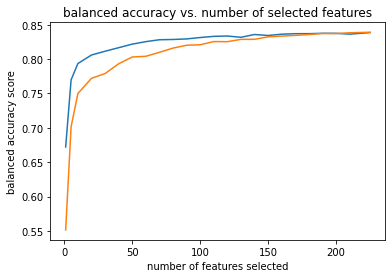

In [0]:
plt.plot(df_f_225_1_test['n_feature_steps'], df_f_225_1_test['average_score'], log_matric['n_feature_steps'], log_matric['average_score'])
plt.title('balanced accuracy vs. number of selected features')
plt.xlabel('number of features selected')
plt.ylabel('balanced accuracy score')

# Training curve

In [0]:
## Reload the data here
X, y, M, user_index, feature_names, label_names = load_all_data()

# Only select body state label
target_label = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'BICYCLING', 'OR_standing']

# Use the last 5 user's data as test set
test_uuid = list(range(56, 61))

# Fill the Nan with mean value and normalize all the data 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

# Transform 
# 1. select target labels 
# 2. tansform feature matrix fill None with mean and do the normalization
# 3. Split train, validation and test set by ratio of 6:2:2
X_new, y_new, M_new = select_target_labels(X, y, M, target_label , label_names, drop_all_zero = False)
X_new = pipeline.fit_transform(X_new, y_new)
X_train, y_train, M_train, X_val, y_val, M_val, X_test, y_test, M_test = random_split(X_new, y_new, M_new, test_size = 0.2, val_size = 0.2, random_seed = 42)

In [0]:
mlp = MLP_model([16, 16], target_label, epoches = 1, learning_rate = 0.00005)
train_curve = pd.DataFrame({'epoch':[], 'accuracy':[], 'sensitivity':[], 'specificity':[], 'BA':[]})
epoches = 40
for epoch in range(epoches):
  mlp.fit(X_train, y_train, M_train = M_train)
  acc, sensitivity, specificity, BA = evaluate_model(mlp, X_val, y_val, W_test = abs(1-M_val))
  train_curve = train_curve.append({'epoch':epoch+1, 'accuracy':acc, 'sensitivity':sensitivity, 'specificity':specificity, 'BA':BA}, ignore_index=True)

accuaracy      sensitivity    specificity    BA             
0.771932       0.739986       0.775809       0.757897       
accuaracy      sensitivity    specificity    BA             
0.801751       0.806068       0.789054       0.797561       
accuaracy      sensitivity    specificity    BA             
0.802488       0.818097       0.805101       0.811599       
accuaracy      sensitivity    specificity    BA             
0.798647       0.826666       0.799687       0.813177       
accuaracy      sensitivity    specificity    BA             
0.806508       0.835124       0.801357       0.818241       
accuaracy      sensitivity    specificity    BA             
0.805818       0.847056       0.797859       0.822458       
accuaracy      sensitivity    specificity    BA             
0.810732       0.847730       0.804737       0.826233       
accuaracy      sensitivity    specificity    BA             
0.811823       0.849064       0.804188       0.826626       
accuaracy      sensitivi

In [0]:
train_curve

epoch  accuracy  sensitivity  specificity        BA
0     1.0  0.771932     0.739986     0.775809  0.757897
1     2.0  0.801751     0.806068     0.789054  0.797561
2     3.0  0.802488     0.818097     0.805101  0.811599
3     4.0  0.798647     0.826666     0.799687  0.813177
4     5.0  0.806508     0.835124     0.801357  0.818241
5     6.0  0.805818     0.847056     0.797859  0.822458
6     7.0  0.810732     0.847730     0.804737  0.826233
7     8.0  0.811823     0.849064     0.804188  0.826626
8     9.0  0.814932     0.845158     0.807413  0.826285
9    10.0  0.819523     0.841555     0.813704  0.827629
10   11.0  0.820808     0.842013     0.818062  0.830037
11   12.0  0.820180     0.849667     0.813413  0.831540
12   13.0  0.821819     0.850461     0.815627  0.833044
13   14.0  0.832241     0.838678     0.825698  0.832188
14   15.0  0.828260     0.851773     0.817935  0.834854
15   16.0  0.815027     0.862460     0.807610  0.835035
16   17.0  0.821454     0.861899     0.811130  0.836515
17   18.0  0.821456     0.868160     0.805234  0.836697
18   19.0  0.828486     0.855362     0.819730  0.837546
19   20.0  0.827735     0.849486     0.823577  0.836532
20   21.0  0.831447     0.851122     0.824885  0.838003
21   22.0  0.818838     0.860368     0.811080  0.835724
22   23.0  0.826410     0.865230     0.813594  0.839412
23   24.0  0.818805     0.860971     0.805569  0.833270
24   25.0  0.839190     0.842128     0.834081  0.838104
25   26.0  0.831644     0.853844     0.816982  0.835413
26   27.0  0.839829     0.846337     0.827473  0.836905
27   28.0  0.838728     0.853199     0.822394  0.837796
28   29.0  0.854670     0.821107     0.853280  0.837193
29   30.0  0.824253     0.865993     0.810392  0.838193
30   31.0  0.842269     0.833159     0.841534  0.837346
31   32.0  0.845286     0.843375     0.836652  0.840013
32   33.0  0.833555     0.851939     0.827444  0.839691
33   34.0  0.843419     0.839902     0.838595  0.839249
34   35.0  0.825520     0.864687     0.809625  0.837156
35   36.0  0.825033     0.865801     0.808476  0.837139
36   37.0  0.839481     0.846497     0.833295  0.839896
37   38.0  0.817664     0.880410     0.793429  0.836919
38   39.0  0.847378     0.831659     0.845630  0.838645
39   40.0  0.813914     0.871684     0.797814  0.834749

Text(0, 0.5, 'scores %')

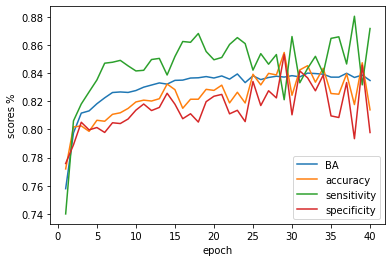

In [0]:
plt.plot(train_curve['epoch'], np.array([train_curve['BA'], train_curve['accuracy'], train_curve['sensitivity'], train_curve['specificity']]).T)
plt.legend(['BA', 'accuracy', 'sensitivity', 'specificity'])
plt.xlabel('epoch')
plt.ylabel('scores %')

# Plot different label's score 

In [0]:
# Only select body state label
target_label = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'BICYCLING', 'OR_standing']

# Use the last 5 user's data as test set
test_uuid = list(range(56, 61))

# Fill the Nan with mean value and normalize all the data 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

# Transform 
# 1. select target labels 
# 2. tansform feature matrix fill None with mean and do the normalization
# 3. Split train, validation and test set by ratio of 6:2:2
X_new, y_new, M_new = select_target_labels(X, y, M, label_names , label_names, drop_all_zero = False)
X_new = pipeline.fit_transform(X_new, y_new)
X_train, y_train, M_train, X_val, y_val, M_val, X_test, y_test, M_test = random_split(X_new, y_new, M_new, test_size = 0.2, val_size = 0.2, random_seed = 42)

In [0]:
mlp = MLP_model([16, 16], label_names, epoches = 30, learning_rate = 0.00005)
mlp.fit(X_train, y_train, M_train = M_train)

In [0]:
evaluate_model(mlp, X_test, y_test, W_test = abs(1-M_test))

accuaracy      sensitivity    specificity    BA             
0.797635       0.858991       0.793060       0.826026       


(0.7976345542835803,
 0.8589907490921613,
 0.7930604940443652,
 0.8260256215682634)

In [0]:
def score_function_temp(y_test, y_pred, score = 'BA', W_test = None):

	mcm = []
	for i in range(y_test.shape[1]):
		if W_test is not None:
			cm = confusion_matrix(y_test[:,i].T, y_pred[:,i].T, sample_weight = W_test[:,i].T)
		else:
			cm = confusion_matrix(y_test[:,i].T, y_pred[:,i].T)
		cm = np.expand_dims(cm, axis = 0)
		mcm.append(cm)
    
	mcm = np.concatenate(mcm, axis = 0)
	tn = mcm[:, 0, 0]
	tp = mcm[:, 1, 1]
	fn = mcm[:, 1, 0]
	fp = mcm[:, 0, 1]
	
	sensitivity = tp / (tp + fn)
	specificity = tn / (tn + fp)
	BA = (sensitivity + specificity)/2
	accuracy = (tn + tp)/(tn + tp + fn + fp)

	return accuracy, sensitivity, specificity, BA

In [0]:
accuracy, sensitivity, specificity, BA = score_function_temp(y_test, mlp.predict(X_test), W_test = abs(1-M_test))

In [0]:
label_missing_ratio = np.sum(M_train, axis = 0)/M_train.shape[0]

In [0]:
ratio_of_zero = (np.sum(abs(y -1), axis = 0))/y.shape[0]
ratio_of_missing = np.sum(M, axis = 0)/y.shape[0]
ratio_of_all = [1]*51

In [0]:
ratio_of_one = (np.sum(abs(y_train)*abs(M_train-1), axis = 0))/np.sum(abs(M_train-1), axis = 0)
ratio_of_zero = (np.sum(abs(1-y_train)*abs(M_train-1), axis = 0))/np.sum(abs(M_train-1), axis = 0)

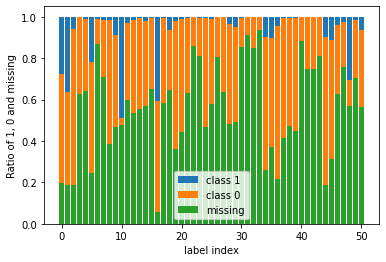

In [9]:
plt.bar(range(51), ratio_of_all)
plt.bar(range(51), ratio_of_zero)
plt.bar(range(51), ratio_of_missing)
plt.xlabel('label index')
plt.ylabel('Ratio of 1, 0 and missing')
plt.legend(['class 1', 'class 0', 'missing'], loc = 'lower center')

<BarContainer object of 51 artists>

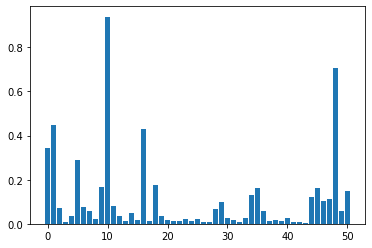

In [0]:
plt.bar(range(51), ratio_of_one)

<BarContainer object of 51 artists>

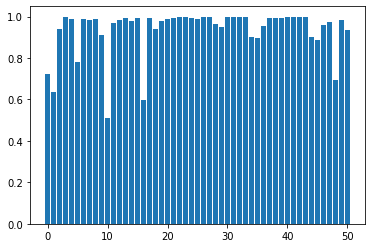

In [0]:
plt.bar(range(51), np.sum(abs(y_train -1), axis = 0)/y_train.shape[0])

<BarContainer object of 51 artists>

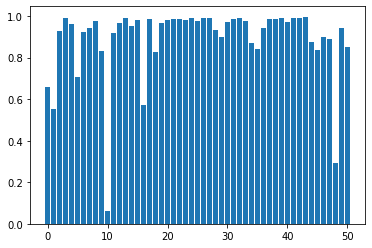

In [0]:
plt.bar(range(51), np.sum(abs(y_train -1)*abs(M_train-1), axis = 0)/np.sum(abs(M_train-1), axis = 0))

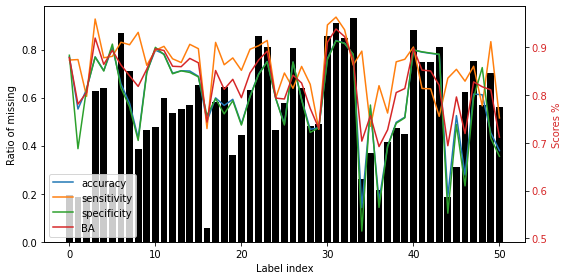

In [0]:
fig, ax1 = plt.subplots(figsize = (8, 4))

color = 'Black'
ax1.set_xlabel('Label index')
ax1.set_ylabel('Ratio of missing', color=color)
ax1.bar(range(51), label_missing_ratio, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Scores %', color=color)  # we already handled the x-label with ax1
ax2.plot(range(51), np.array([accuracy, sensitivity, specificity, BA]).T)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['accuracy', 'sensitivity', 'specificity', 'BA'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

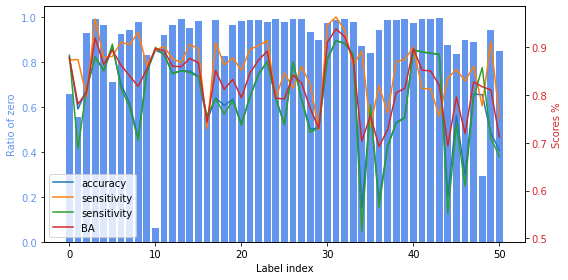

In [0]:
fig, ax1 = plt.subplots(figsize = (8, 4))

color = 'Cornflowerblue'
ax1.set_xlabel('Label index')
ax1.set_ylabel('Ratio of zero', color=color)
ax1.bar(range(51), ratio_of_zero, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Scores %', color=color)  # we already handled the x-label with ax1
ax2.plot(range(51), np.array([accuracy, sensitivity, specificity, BA]).T)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['accuracy', 'sensitivity', 'sensitivity', 'BA'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

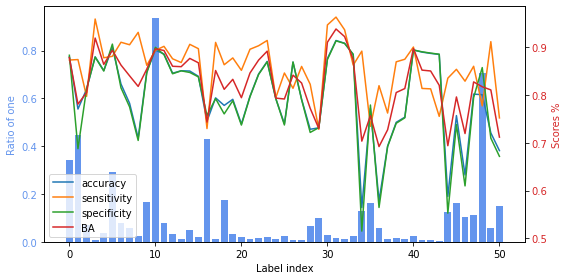

In [0]:
fig, ax1 = plt.subplots(figsize = (8, 4))

color = 'Cornflowerblue'
ax1.set_xlabel('Label index')
ax1.set_ylabel('Ratio of one', color=color)
ax1.bar(range(51), ratio_of_one, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Scores %', color=color)  # we already handled the x-label with ax1
ax2.plot(range(51), np.array([accuracy, sensitivity, specificity, BA]).T)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['accuracy', 'sensitivity', 'specificity', 'BA'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [0]:
ratio_of_one = (np.sum(abs(y_train)*abs(M_train-1), axis = 0))/np.sum(abs(M_train-1), axis = 0)
ratio_of_zero = (np.sum(abs(1-y_train)*abs(M_train-1), axis = 0))/np.sum(abs(M_train-1), axis = 0)

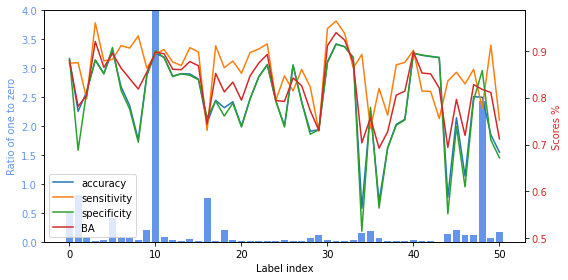

In [0]:
fig, ax1 = plt.subplots(figsize = (8, 4))

color = 'Cornflowerblue'
ax1.set_xlabel('Label index')
ax1.set_ylabel('Ratio of one to zero', color=color)
ax1.bar(range(51), ratio_of_one/ratio_of_zero, color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim((0,4))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Scores %', color=color)  # we already handled the x-label with ax1
ax2.plot(range(51), np.array([accuracy, sensitivity, specificity, BA]).T)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['accuracy', 'sensitivity', 'specificity', 'BA'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()